In [ ]:
import os
import tensorflow as tf
from IPython.display import Audio
from teal.augment import InversePolarity, RandomGain, RandomNoise
from teal.feature import Normalize

In [ ]:
file_path = "samples/led.wav"
sr = 22050

with open(file_path, "rb") as f:
    audio_data = f.read()

audio, _ = tf.audio.decode_wav(audio_data)
audio = tf.transpose(audio).numpy()
audio_chunk = audio[:, :sr * 3] # First 3 seconds

In [ ]:
Audio(audio_chunk, rate=sr)

## Inverse Polarity

In [ ]:
inversed = InversePolarity(chance=1.)(audio_chunk, training=True)

Audio(inversed.numpy(), rate=sr)

If added with original example, the result should be silence

In [ ]:
silence = inversed.numpy() + audio_chunk

Audio(silence, rate=sr, normalize=False)

## Random Gain

In [ ]:
random_gain = RandomGain(chance=1., min_factor=0.4, max_factor=0.5)(audio_chunk, training=True)

Audio(random_gain.numpy(), rate=sr, normalize=False)

In [ ]:
normalized = Normalize()(random_gain)

Audio(normalized.numpy(), rate=sr, normalize=False)

## Random Noise

In [ ]:
random_noise = RandomNoise(chance=1., max_noise=0.02)(audio_chunk, training=True)

Audio(random_noise.numpy(), rate=sr)

In [ ]:
normalized_with_noise = Normalize()(random_noise)

Audio(normalized_with_noise.numpy(), rate=sr, normalize=False)

In [1]:
import librosa
import numpy as np
from teal.stft import STFT
from tests.utils import *
import matplotlib.pyplot as plt

In [20]:
example = get_audio_examples()[0]


result = STFT(N_FFT, HOP_LEN)(np.expand_dims(example, axis=0))[0]

In [21]:
result.shape

TensorShape([126, 1025])

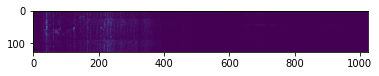

In [22]:
plt.imshow(tf.abs(result))

In [23]:
expected = librosa.stft(
    example.numpy(), n_fft=N_FFT,
    hop_length=HOP_LEN, center=False
)

In [24]:
expected.shape

(1025, 126)

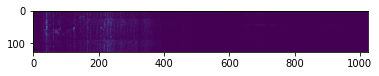

In [25]:
plt.imshow(np.transpose(np.abs(expected)))

In [26]:
result.numpy().max()

(48.82793+44.86312j)

In [27]:
expected.max()

(48.82794+44.863148j)

In [28]:
result.numpy().min()

(-55.14981-77.995026j)

In [29]:
expected.min()

(-55.149815-77.99507j)

In [31]:
diff = np.transpose(expected) - result

In [34]:
diff.numpy().max()

(0.00027972087-0.00040715933j)

In [35]:
diff.numpy().min()

(-0.00025048852+0.00023636222j)